IMPORTING LIBRARIES


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
tf.random.set_seed(3)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from collections import Counter


DIVIDING DATA INTO FOLDERS


In [3]:
import splitfolders
data_dir= 'C:/Users/samar/OneDrive/Desktop/Programs/Personal-Project/Driver-Drowsiness-Detection/Datasets/'
output_dir= 'C:/Users/samar/OneDrive/Desktop/Programs/Personal-Project/Driver-Drowsiness-Detection/Datasets/splitted_Data'
splitfolders.ratio(data_dir, output=output_dir, seed=1337, ratio=(.8, .15, .05))


Copying files: 41793 files [03:27, 201.71 files/s]


DEFINING DIRECTORIES


In [4]:
train_dir= 'C:/Users/samar/OneDrive/Desktop/Programs/Personal-Project/Driver-Drowsiness-Detection/Datasets/splitted_Data/train'
test_dir= 'C:/Users/samar/OneDrive/Desktop/Programs/Personal-Project/Driver-Drowsiness-Detection/Datasets/splitted_Data/test'
val_dir= 'C:/Users/samar/OneDrive/Desktop/Programs/Personal-Project/Driver-Drowsiness-Detection/Datasets/splitted_Data/val'

CREATING IMAGE DATA GENERATOR


In [5]:
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)
val_datagen= ImageDataGenerator(rescale=1./255)


FOR TRAINING


In [6]:
train_batches= train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224),
    batch_size=16, class_mode='binary', shuffle=True
)

Found 33434 images belonging to 3 classes.


FOR TESTING


In [7]:
test_batches= test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=16, class_mode='binary', shuffle=True
)

Found 2091 images belonging to 3 classes.


FOR VALIDATION


In [8]:
val_batches= val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=16, class_mode='binary', shuffle=True
)

Found 6268 images belonging to 3 classes.


VERIFYING THE THINGS (PREPROCESSING)


In [9]:
train_class_indices= train_batches.class_indices
test_class_indices= test_batches.class_indices
val_class_indices= val_batches.class_indices

train_class_labels= train_batches.classes
test_class_labels= test_batches.classes
val_class_labels= val_batches.classes

train_class_counts= Counter(train_class_labels)
test_class_counts= Counter(test_class_labels)
val_class_counts= Counter(val_class_labels)

print("Class Names for train: \n", train_class_indices)
print("Class Counts for train: \n", train_class_counts)
print(end='\n')

print("Class Names for test: \n", test_class_indices)
print("Class Counts for test: \n", test_class_counts)
print(end='\n')

print("Class Names for validation: \n", val_class_indices)
print("Class Counts for validation: \n", val_class_counts)
print(end='\n')


Class Names for train: 
 {'Drowsy': 0, 'Non Drowsy': 1, 'splitted_Data': 2}
Class Counts for train: 
 Counter({0: 17878, 1: 15556})

Class Names for test: 
 {'Drowsy': 0, 'Non Drowsy': 1, 'splitted_Data': 2}
Class Counts for test: 
 Counter({0: 1118, 1: 973})

Class Names for validation: 
 {'Drowsy': 0, 'Non Drowsy': 1, 'splitted_Data': 2}
Class Counts for validation: 
 Counter({0: 3352, 1: 2916})



CHECKING NORMALIZATION


Pixels of the first image after Normalization: 

[[[0.6        0.52156866 0.45098042]
  [0.6        0.52156866 0.44705886]
  [0.59607846 0.5176471  0.43921572]
  ...
  [0.7568628  0.68235296 0.57254905]
  [0.7568628  0.68235296 0.57254905]
  [0.7568628  0.68235296 0.57254905]]

 [[0.6039216  0.5294118  0.454902  ]
  [0.6039216  0.5254902  0.454902  ]
  [0.6        0.52156866 0.45098042]
  ...
  [0.7607844  0.6901961  0.5764706 ]
  [0.7607844  0.6901961  0.5764706 ]
  [0.76470596 0.69411767 0.5764706 ]]

 [[0.6117647  0.53333336 0.45882356]
  [0.60784316 0.53333336 0.45882356]
  [0.6039216  0.5294118  0.454902  ]
  ...
  [0.76470596 0.69803923 0.5764706 ]
  [0.76470596 0.69803923 0.5764706 ]
  [0.7686275  0.7019608  0.5803922 ]]

 ...

 [[0.92549026 0.8352942  0.7803922 ]
  [0.92549026 0.8313726  0.7725491 ]
  [0.9176471  0.82745105 0.76470596]
  ...
  [1.         1.         0.9568628 ]
  [1.         1.         0.9568628 ]
  [1.         1.         0.9568628 ]]

 [[0.95294124 0.87843144 

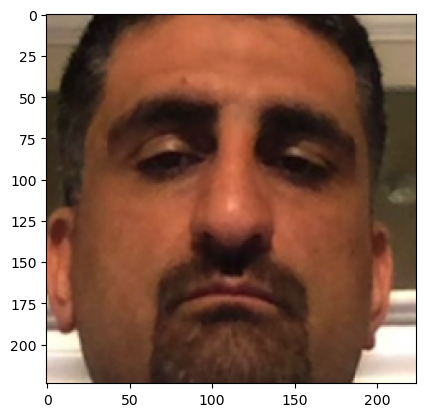

In [10]:
images, labels= next(train_batches)
print(f"Pixels of the first image after Normalization: \n\n{images[0]}")
plt.imshow(images[0])
plt.show()

CHECKING CHANNELS (RGB), IMGS SHAPES


In [11]:
print(f"there are {images[0].ndim} Channels")
print(f"image shpae: {images[0].shape}")

there are 3 Channels
image shpae: (224, 224, 3)


DISPLAY THE FIRST 45 TRAINING IMAGES


CHECKING SHUFFLING


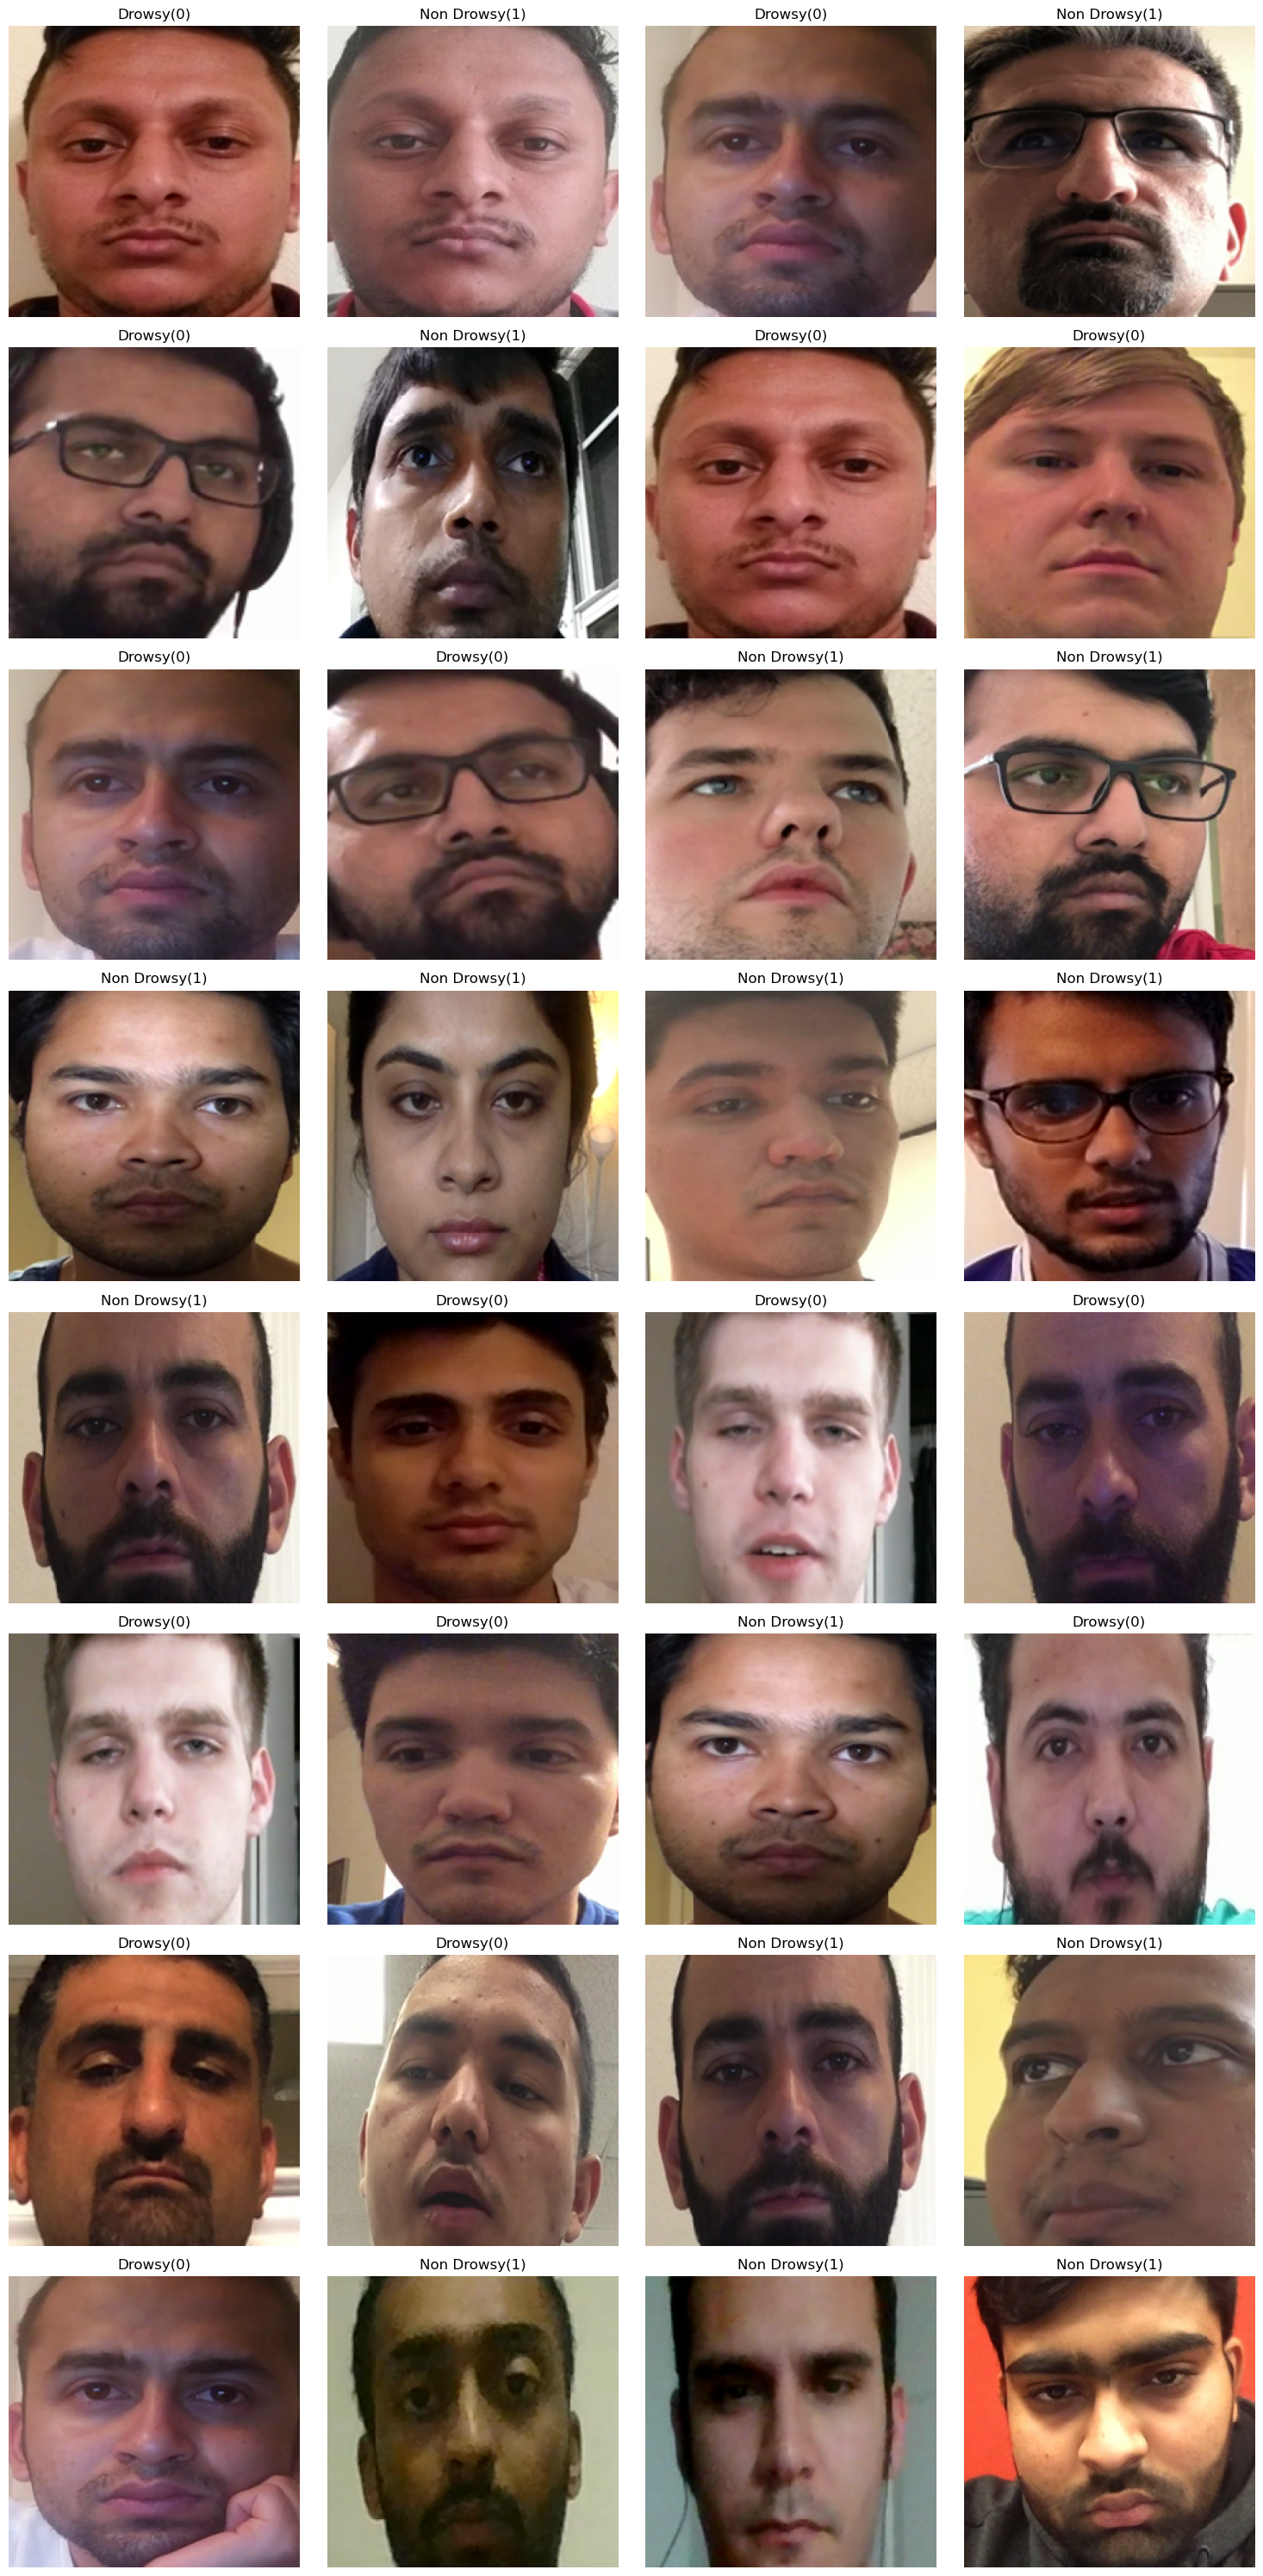

In [12]:
fig, axes= plt.subplots(8,4, figsize=(15,30))
class_indices= train_batches.class_indices

for i in range(8):
    images, labels= next(train_batches)
    for j in range(4):
        ax= axes[i,j]
        ax.imshow(images[j])
        ax.axis('off')
        label= int(labels[j])
        label_name= list(class_indices.keys())[list(class_indices.values()).index(label)]
        ax.set_title(f'{label_name}({label})')

plt.tight_layout()
plt.show()

MODELING TIME


LOAD MOBILE NETV2 MODEL


In [13]:
base_model= MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [14]:
type(base_model)

keras.src.models.functional.Functional

GETTING SUMMARY OF VGG16 MODEL


In [15]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

BUILD A NEW SEQUENTIAL MODEL


In [16]:
model= keras.Sequential()

FREEZE LAYERS


In [17]:
for layer in base_model.layers[:25]:
    layer.trainable= False

DEFINE THE ARCHITECTURE OF THE NEURAL THE NEW MODEL


In [18]:
x= base_model.output
x= Flatten()(x)
x= Dense(1024, activation='relu')(x)
x= Dense(512, activation='relu')(x)
predictions= Dense(2, activation='softmax')(x)

In [19]:
model= Model(inputs= base_model.input, outputs=predictions)

SUMMARY OF THE MODEL


In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 67,010,114 (255.62 MB)

 Trainable params: 66,960,258 (255.43 MB)

 Non-trainable params: 49,856 (194.75 KB)

COMPILING THE MODEL


In [21]:
model.compile(optimizer=Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

TRAINING THE MODEL


In [22]:
history= model.fit( train_batches, epochs=10, validation_data=val_batches, batch_size=32)

Epoch 1/10


c:\Users\samar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2090/2090 ━━━━━━━━━━━━━━━━━━━━ 2220s 1s/step - accuracy: 0.9783 - loss: 0.0787 - val_accuracy: 0.9989 - val_loss: 0.0040
Epoch 2/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 1999s 956ms/step - accuracy: 0.9983 - loss: 0.0113 - val_accuracy: 0.9997 - val_loss: 0.0023
Epoch 3/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 1929s 922ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9997 - val_loss: 5.3498e-04
Epoch 4/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 2082s 996ms/step - accuracy: 0.9976 - loss: 0.0140 - val_accuracy: 0.9995 - val_loss: 0.0097
Epoch 5/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 5304s 3s/step - accuracy: 0.9993 - loss: 0.0060 - val_accuracy: 0.9994 - val_loss: 0.0021
Epoch 6/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 27322s 13s/step - accuracy: 0.9983 - loss: 0.0119 - val_accuracy: 0.9989 - val_loss: 0.0062
Epoch 7/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 2061s 986ms/step - accuracy: 0.9986 - loss: 0.0119 - val_accuracy: 0.9998 - val_loss: 9.2676e-04
Epoch 8/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 1887s 903ms/step - accu

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


EVALUATION


In [25]:
loss, accuracy= model.evaluate(train_batches)

print(f"Training Loss: {loss:.4f}")
print(f"Training Accuracy: {accuracy*100:.2f}%")


2090/2090 ━━━━━━━━━━━━━━━━━━━━ 539s 258ms/step - accuracy: 1.0000 - loss: 4.6771e-05
Training Loss: 0.0001
Training Accuracy: 99.99%


In [26]:
loss, accuracy = model.evaluate(test_batches)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

c:\Users\samar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 38s 287ms/step - accuracy: 0.9999 - loss: 2.4606e-04
Test Loss: 0.0008
Test Accuracy: 99.95%


In [27]:
y_pred = model.predict(test_batches)

y_pred_labels = np.argmax(y_pred, axis=1)

131/131 ━━━━━━━━━━━━━━━━━━━━ 25s 178ms/step


In [28]:
y_actual= test_batches.labels

COMPUTING THE CONFUSION MATRIX


In [29]:
conf_matrix= confusion_matrix(y_actual, y_pred_labels)
print(conf_matrix)

[[581 537]
 [538 435]]


PLOTTING CONFUSION MATRIX


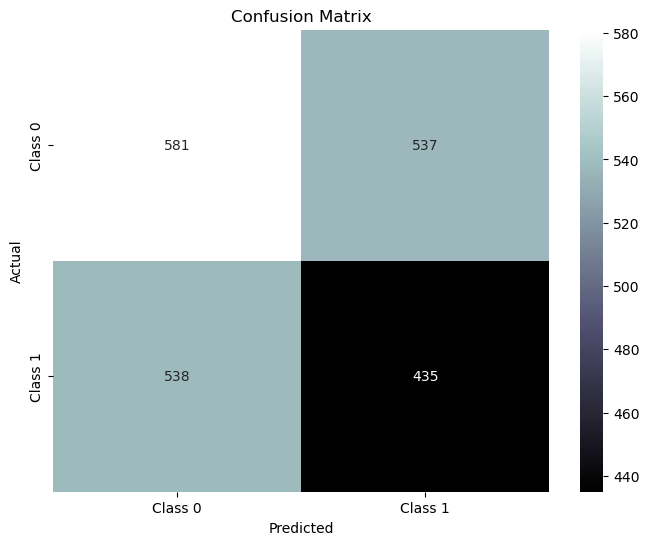

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
report= classification_report(y_actual, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1118
           1       0.45      0.45      0.45       973

    accuracy                           0.49      2091
   macro avg       0.48      0.48      0.48      2091
weighted avg       0.49      0.49      0.49      2091



PROJECT ENDED
